**1. Importing the necessary libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
%matplotlib inline
import cv2 

**2. Define the Logistic Regression model**

In [2]:
model = keras.Sequential([
    layers.Flatten(input_shape=(64, 64, 3)),
    layers.Dense(1, activation='sigmoid')
])

**3. Compile the model**

In [3]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 1)                 12289     
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


**4. Load and preprocess the data**

In [4]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [5]:
training_set = train_datagen.flow_from_directory(
    r"D:\Casting\train",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 6633 images belonging to 2 classes.


In [6]:
test_set = test_datagen.flow_from_directory(
    r"D:\Casting\test",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 715 images belonging to 2 classes.


**5. Train the model**

In [7]:
result = model.fit(
    training_set,
    epochs=10,
    validation_data=test_set
    
)

Epoch 1/10
208/208 [==============================] - 16s 76ms/step - loss: 0.6294 - accuracy: 0.6914 - val_loss: 0.4960 - val_accuracy: 0.7357
Epoch 2/10
208/208 [==============================] - 23s 112ms/step - loss: 0.5123 - accuracy: 0.7528 - val_loss: 0.5348 - val_accuracy: 0.7329
Epoch 3/10
208/208 [==============================] - 24s 115ms/step - loss: 0.4952 - accuracy: 0.7601 - val_loss: 0.5798 - val_accuracy: 0.7147
Epoch 4/10
208/208 [==============================] - 24s 114ms/step - loss: 0.4345 - accuracy: 0.8008 - val_loss: 0.4643 - val_accuracy: 0.7594
Epoch 5/10
208/208 [==============================] - 24s 115ms/step - loss: 0.4122 - accuracy: 0.8111 - val_loss: 0.3965 - val_accuracy: 0.7944
Epoch 6/10
208/208 [==============================] - 24s 115ms/step - loss: 0.4471 - accuracy: 0.7889 - val_loss: 0.5127 - val_accuracy: 0.7510
Epoch 7/10
208/208 [==============================] - 24s 114ms/step - loss: 0.4582 - accuracy: 0.7862 - val_loss: 0.3646 - val_acc

**6. Plotting the training and validation loss**

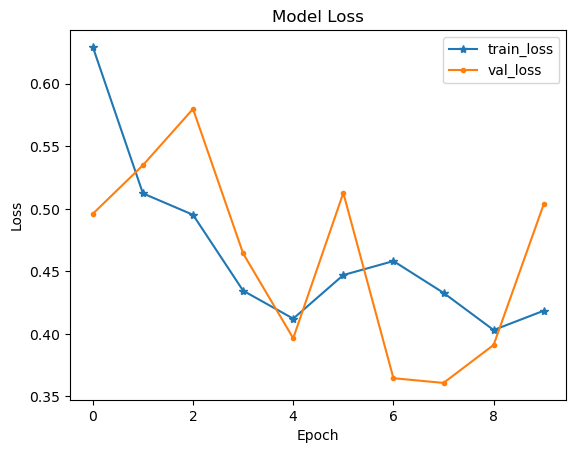

In [8]:
plt.plot(result.history['loss'], label='train_loss',marker = '*')
plt.plot(result.history['val_loss'], label='val_loss',marker = '.')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**7. Plotting the training and validation accuracy**

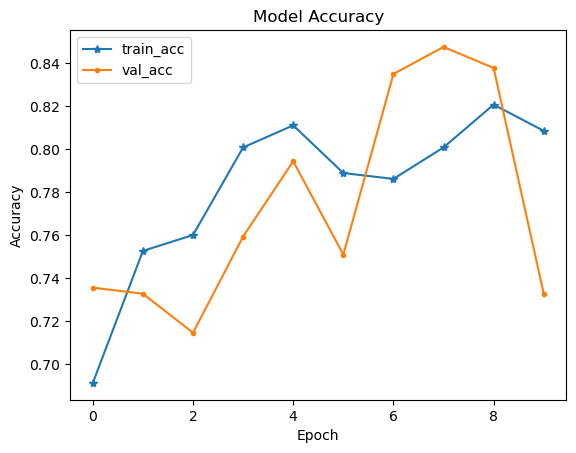

In [9]:
plt.plot(result.history['accuracy'], label='train_acc',marker = '*')
plt.plot(result.history['val_accuracy'], label='val_acc',marker = '.')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**8. Save the model**

In [10]:
import os
os.chdir('D:/Casting')

In [11]:
model.save('logistic_regression_model.h5')

**9. Define a function to make predictions using the saved model**

In [12]:
def model_output(path):
    model = keras.models.load_model('logistic_regression_model.h5')
    img = keras.preprocessing.image.load_img(path, target_size=(64, 64))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.
    prob = model.predict(img_array)[0][0]
    plt.imshow(plt.imread(path))
    print('Probability:', prob)
    if prob > 0.5:
        print("It's an ok_front")
    else:
        print("It's a def_front")

**10. Use the function to make a prediction**

1/1 [==============================] - 0s 88ms/step
Probability: 0.0014880967
It's a def_front


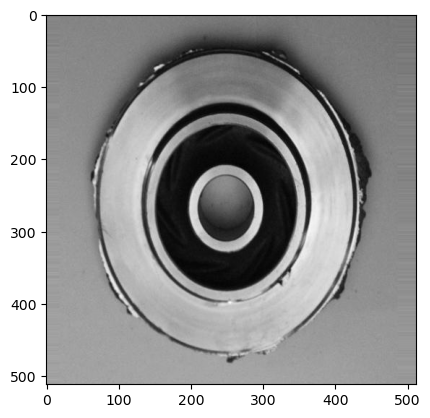

In [13]:
model_output("D:\Casting\casting_image\def_front\cast_def_0_0.jpeg")

1/1 [==============================] - 0s 47ms/step
Probability: 0.016224746
It's a def_front


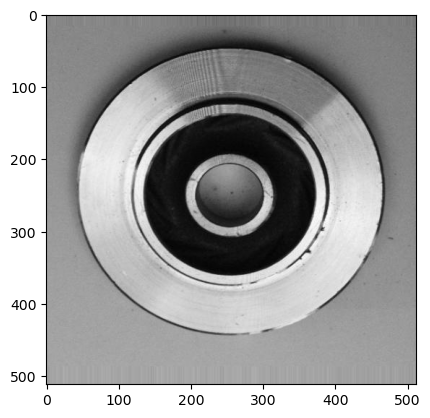

In [14]:
model_output("D:\Casting\casting_512x512\def_front\cast_def_0_240.jpeg")

1/1 [==============================] - 0s 53ms/step
Probability: 0.61455524
It's an ok_front


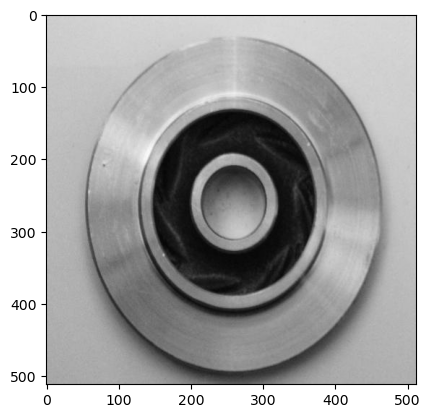

In [15]:
model_output("D:\Casting\casting_512x512\ok_front\cast_ok_0_35.jpeg")

1/1 [==============================] - 0s 31ms/step
Probability: 0.010186471
It's a def_front


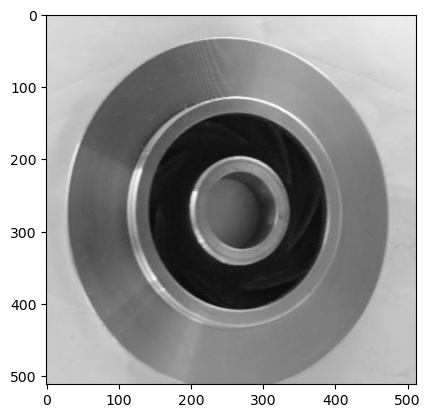

In [16]:
model_output("D:\Casting\casting_512x512\ok_front\cast_ok_0_638.jpeg")